# Work with new tsv file.
(File was get from Raiko Komissarov, 2020 pipeline)

In [1]:
from collections import defaultdict
import pandas as pd

PATH_TO_TSV = "../havefun.tsv"
PATH_TO_META = "../metadata_2021-02-02_09-53.tsv"

### First: parse file and get dictionaries

In [2]:
# Function for reading tsv in the format MUT \t viruses_lane
def read_mut_virus(path):

    mut2virus = defaultdict(list)
    virus2mut = defaultdict(list)

    with open(path) as fh:
        for line in fh:
            line = line.split("\t")
            mut = line[0]
            viruses = line[1].split(",")

            # check that only 1 time each mutation (is everything ok with tsv)
            if mut in mut2virus.keys():
                print("ATTENTION")

            # Add to dict
            mut2virus[mut] = viruses
            for i in viruses:
                virus2mut[i].append(mut)
    return mut2virus, virus2mut


# Function to remove single nucleotide snips found in only 1 virus
def clean_mut_from_mut(d, min_size):
    from collections import defaultdict

    d_new = defaultdict()
    d_bad = dict()
    n = 0
    for i in d.keys():
        if i[1].isalpha() or i[-2].isalpha():  # dont delete insertions and deletions!
            d_new[i] = d[i]
            n += 1
            continue
        elif len(d[i]) > min_size:
            d_new[i] = d[i]
        else:
            d_bad[i] = d[i]
    print(str(n) + " insertions and deletions")
    return d_new, d_bad


# a function to remove single nucleotide snips obtained in the previous step from the dictionary with viruses
## !superslow,
def clean_mut_from_virus(d, false_mutations):
    d_new = d.copy()
    for key in d.keys():
        for mut in false_mutations.keys():
            if mut in d[key]:
                d_new[key].remove(mut)
    return d_new


# I suggest just creating a new dictionary
def from_mut2virus_to_virus2mut(mut2virus):
    virus2mut = defaultdict(list)
    for mut in mut2virus.keys():
        for virus in mut2virus[mut]:
            virus2mut[virus].append(mut)
    return virus2mut

In [3]:
mut2virus, virus2mut = read_mut_virus(PATH_TO_TSV)
# check
virus2mut["Albania/Cento-30536457/2020"], mut2virus["12759_A_G"]

(['241_C_T',
  '3037_C_T',
  '11842_G_A',
  '12759_A_G',
  '14408_C_T',
  '18292_G_T',
  '20268_A_G',
  '23403_A_G',
  '23896_C_T',
  '27813_C_T',
  '28076_C_A',
  '28077_G_A',
  '28854_C_T'],
 ['Albania/Cento-30536457/2020',
  'Austria/CeMM1376/2020',
  'Belgium/ULG-10449/2020',
  'Belgium/ULG-10600/2020',
  'Belgium/ULG-10601/2020',
  'Belgium/ULG-10608/2020',
  'Belgium/ULG-10960/2020',
  'Belgium/rega-1644/2021',
  'Denmark/ALAB-HH-174/2020',
  'Denmark/DCGC-14099/2020',
  'Denmark/DCGC-15431/2020',
  'Denmark/DCGC-1942/2020',
  'Denmark/DCGC-2009/2020',
  'Denmark/DCGC-2013/2020',
  'Denmark/DCGC-2031/2020',
  'Denmark/DCGC-2065/2020',
  'Denmark/DCGC-2374/2020',
  'Denmark/DCGC-2380/2020',
  'Denmark/DCGC-2548/2020',
  'Denmark/DCGC-2549/2020',
  'Denmark/DCGC-2721/2020',
  'Denmark/DCGC-2722/2020',
  'Denmark/DCGC-2741/2020',
  'Denmark/DCGC-2765/2020',
  'Denmark/DCGC-2868/2020',
  'Denmark/DCGC-3831/2020',
  'Denmark/DCGC-4160/2020',
  'Denmark/DCGC-4694/2020',
  'Denmark/DCGC

In [4]:
# removal of single nucleotide snips found in only 1 virus
mut2virus_filtered, false_mutations = clean_mut_from_mut(mut2virus, 1)
len(mut2virus_filtered)

2274 insertions and deletions


40816

In [5]:
# removal of single nucleotide snips obtained in the previous step from the dictionary with viruses
virus2mut_filtered = from_mut2virus_to_virus2mut(mut2virus_filtered)
len(virus2mut_filtered)

467037

In [6]:
print(f"Before: {len(mut2virus)}, {len(virus2mut)}")
print(f"Now: {len(mut2virus_filtered)}, {len(virus2mut_filtered)}")

Before: 55602, 475135
Now: 40816, 467037


In [7]:
mut2virus_filtered.keys()

dict_keys(['241_C_T', '3037_C_T', '11842_G_A', '12759_A_G', '14408_C_T', '18292_G_T', '20268_A_G', '23403_A_G', '23896_C_T', '27813_C_T', '28076_C_A', '28077_G_A', '28854_C_T', '1059_C_T', '10582_C_T', '18115_C_T', '25563_G_T', '25777_C_T', '26461_C_T', '29353_C_T', '5730_C_T', '3619_C_T', '5183_C_T', '9430_C_T', '17550_C_T', '23383_G_A', '23868_G_T', '28253_C_T', '28254_A_C', '28744_C_T', '2305_G_T', '18928_C_T', '28881_G_A', '28882_G_A', '28883_G_C', '8097_C_T', '19086_G_T', '25721_C_T', '19839_T_C', '5144_C_T', '7264_T_C', '7764_C_T', '10279_C_T', '10870_G_T', '12367_C_T', '24236_G_T', '27804_C_T', '28830_C_A', '29466_C_T', '15480_C_T', '16060_A_C', '19017_C_T', '11580_C_T', '18877_C_T', '22444_C_T', '22591_C_T', '26735_C_T', '6232_T_C', '25794_T_C', '26627_A_G', '28774_G_T', '5654_C_T', '12070_G_T', '14267_C_T', '26501_G_C', '949_A_G', '18677_G_T', '28903_G_T', '6199_T_C', '25782_C_T', '13335_C_T', '24937_C_T', '25599_G_T', '27965_A_G', '4762_A_C', '7765_C_T', '15327_G_T', '25459_G

## Metainformation

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime

In [9]:
def return_meta(path):
    new_meta = pd.read_csv(path, sep="\t")

    print(f'Delete {new_meta[~(new_meta.host=="Human")].shape[0]} - not human')
    new_meta = new_meta[(new_meta.host == "Human")]

    required_columns = [
        "strain",
        "gisaid_epi_isl",
        "date",
        "region",
        "country",
        "division",
        "location",
        "region_exposure",
        "country_exposure",
        "division_exposure",
        "length",
        "age",
        "sex",
        "Nextstrain_clade",
        "pangolin_lineage",
        "GISAID_clade",
    ]
    # 'Nextstrain_clade', 'pangolin_lineage', 'GISAID_clade' - 3 of classification types,
    # we will use the 3rd (the most populaer) и the 1st one
    new_meta = new_meta[required_columns]

    #     new_meta['virus_id'] = new_meta['strain'].str.replace("/", "_").str.cat(new_meta['gisaid_epi_isl'], sep='_', na_rep='-').str.cat(new_meta['date'], sep='_', na_rep='-')
    new_meta["Virus_id"] = new_meta["strain"]
    new_meta = new_meta.drop(["strain", "gisaid_epi_isl"], axis=1, errors="ignore")

    return new_meta

In [10]:
meta = return_meta(PATH_TO_META)
meta.head()

/tmp/ipykernel_35964/2486120958.py:1: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  meta = return_meta(PATH_TO_META)


Delete 1035 - not human


date  region  country  division location region_exposure  \
0  2020-09-05  Europe  Albania   Albania      NaN          Europe   
1  2020-03-02  Africa  Algeria  Boufarik      NaN          Africa   
2  2020-03-08  Africa  Algeria     Blida      NaN          Africa   
3  2020-03-02  Africa  Algeria  Boufarik      NaN          Africa   
4     2020-06  Africa  Algeria     Alger      NaN          Africa   

  country_exposure division_exposure  length age     sex Nextstrain_clade  \
0          Albania           Albania   29903  28    Male              20A   
1          Algeria          Boufarik   29730  28  Female              20C   
2          Algeria             Blida   29846  87    Male              20C   
3          Algeria          Boufarik   29822  41    Male              20C   
4          Algeria             Alger   29782  70  Female              20A   

  pangolin_lineage GISAID_clade                     Virus_id  
0          B.1.236            G  Albania/Cento-30536457/2020  
1              B.1           GH      Algeria/G0638_2264/2020  
2              B.1           GH      Algeria/G0640_2265/2020  
3              B.1           GH      Algeria/G0860_2262/2020  
4              B.1            G     Algeria/G33030-8855/2020

In [11]:
print(meta.shape)

(455149, 15)


## Add information about days
(for diagrams)

In [12]:
def date_to_day(date_str):
    try:
        start_str = '2019-11-01' # Start - 01 november 2019
        format_str = '%Y-%m-%d' # The format
        datetime_obj = datetime.datetime.strptime(date_str, format_str)
        start = datetime.datetime.strptime(start_str, format_str)
        if datetime.datetime.today() <= datetime_obj:
            return np.nan
        day_of_year = (datetime_obj - start).days
        return int(day_of_year)
    except ValueError:
        return np.nan
    
def day_to_date(day):
    try:
        dt = datetime.datetime(2019,11,1)
        dtdelta = datetime.timedelta(days=day)
        date_obj = dt + dtdelta
        day = str(date_obj.day)
        if len(day)==1:
            day = '0'+day
        return f"{str(date_obj.year)}-{str(date_obj.month)}-{day}"
    except ValueError:
        return np.nan

In [13]:
date_col = 'date'
meta['day'] = meta[date_col].apply(date_to_day)
meta.head()

date  region  country  division location region_exposure  \
0  2020-09-05  Europe  Albania   Albania      NaN          Europe   
1  2020-03-02  Africa  Algeria  Boufarik      NaN          Africa   
2  2020-03-08  Africa  Algeria     Blida      NaN          Africa   
3  2020-03-02  Africa  Algeria  Boufarik      NaN          Africa   
4     2020-06  Africa  Algeria     Alger      NaN          Africa   

  country_exposure division_exposure  length age     sex Nextstrain_clade  \
0          Albania           Albania   29903  28    Male              20A   
1          Algeria          Boufarik   29730  28  Female              20C   
2          Algeria             Blida   29846  87    Male              20C   
3          Algeria          Boufarik   29822  41    Male              20C   
4          Algeria             Alger   29782  70  Female              20A   

  pangolin_lineage GISAID_clade                     Virus_id    day  
0          B.1.236            G  Albania/Cento-30536457/2020  309.0  
1              B.1           GH      Algeria/G0638_2264/2020  122.0  
2              B.1           GH      Algeria/G0640_2265/2020  128.0  
3              B.1           GH      Algeria/G0860_2262/2020  122.0  
4              B.1            G     Algeria/G33030-8855/2020    NaN

## Draw time flow

In [14]:
def draw_cumulative_flow(
    meta, clade_col="GISAID_clade", step=14, what="world", plot_step=1, label_to_col = None
):
    meta = meta[~meta[clade_col].isnull()]

    min_day = int(meta.day.min()) - 1
    max_day = int(meta.day.max())
    # Sort all days by day
    sorted_meta = meta.sort_values(by="day")

    # Split to segments.
    days = [i for i in range(min_day, max_day, step)]
    if days[-1] != max_day:
        days.append(max_day)
    week_amount = len(days)

    # Get clade:
    unique_clades = meta[clade_col].unique()
    #     unique_clades = ['GR', 'GH', 'G', 'O', 'L', 'S', 'V', 'GV']
    unique_clades = unique_clades[::-1]  # reverse
    clades_amount = len(unique_clades)

    clade2id = dict()
    id2clade = dict()
    for i, cl in enumerate(unique_clades):
        clade2id[cl] = i
        id2clade[i] = cl

    # 2d array with time
    flow = np.zeros((clades_amount, week_amount))
    for i, (start, end) in enumerate(zip(days[: week_amount - 1], days[1:])):
        datkaa = sorted_meta[(start < sorted_meta.day) & (sorted_meta.day <= end)]
        for cl in unique_clades:
            flow[clade2id[cl]][i] = datkaa[datkaa[clade_col] == cl].shape[0]

    weeks = np.arange(1, week_amount + 1, 1)

    # day to week
    ticks = []
    for week in weeks:
        ticks.append(day_to_date(int(min_day + week * step)))

    labels = list(clade2id.keys())
    zipped_lists = zip(flow, labels)
    sorted_pairs = sorted(zipped_lists, key=lambda x: np.sum(x[0]))

    new_flow = []
    new_labels = []
    for f, l in sorted_pairs:
        new_flow.append(f)
        new_labels.append(l)

    # draw no_data
    if sum((np.sum(flow, axis=0) == 0).astype(float)) > 1:
        nodata=np.zeros(week_amount)
        new_flow.append(nodata)
        new_labels.append("No data")
    if not label_to_col:
        label_to_col = {
            "GR": "#77aadd",
            "GV": "#ee8866",
            "GH": "eedd88",
            "G": "ffaabb",
            "S": "99ddff",
            "O": "44bb99",
            "V": "bbcc33",
            "L": "aaaa00",
            "No data":"dddddd"
        }


    colors = []
    for label in new_labels:
        colors.append(label_to_col[label])

    flow = np.array(new_flow)
    features = flow / flow.sum(axis=0, keepdims=1)
    labels = new_labels
    # The plot:
    # Colors: https://github.com/matplotlib/matplotlib/tree/master/lib/matplotlib/mpl-data/stylelib
    #     plt.style.use("seaborn-pastel")
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_facecolor('xkcd:light grey')
#     ax.set_facecolor((0.0, 0.0, 0.87))
    ax.stackplot(weeks, features, labels=labels, colors=colors)
    fig.canvas.draw()

    ax.set_xticks(weeks[::plot_step])

    ax.set_xticklabels(ticks[::plot_step], rotation=60)

    #     ax.set_xticklabels(labelss)

    # Add relevant y and x labels and text to the plot
    plt.title(f"Cumulative Flow Diagram for {what}", fontsize=20)
    ax.set_ylabel("Frequency", fontsize=20)
    ax.set_xlabel("Time", fontsize=20)
    ax.set_xlim(1, week_amount - 1)
    ax.set_ylim(0, 1)
    plt.legend(fontsize=20)

    plt.savefig(f"Cumulative Flow Diagram for {what}.png")
    plt.show()

/tmp/ipykernel_35964/3468098923.py:78: RuntimeWarning: invalid value encountered in true_divide
  features = flow / flow.sum(axis=0, keepdims=1)


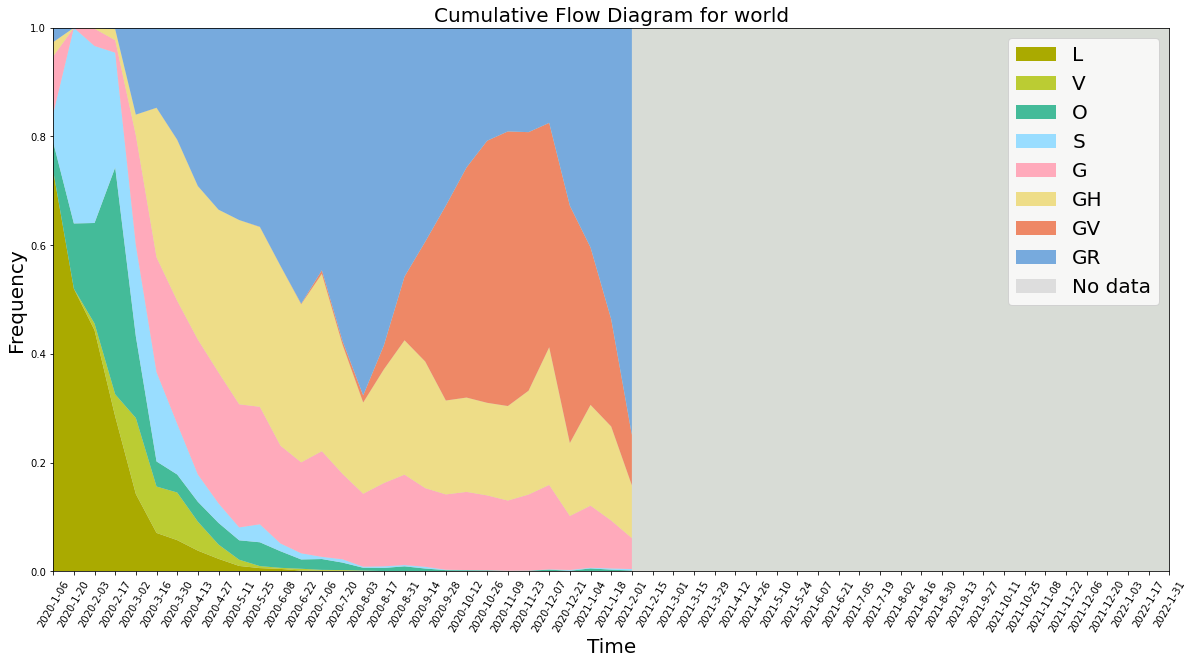

In [15]:
draw_cumulative_flow(meta)

In [16]:
def draw_for_region(meta, type_of_region, region, clade_col="GISAID_clade", step=14, plot_step=1, label_to_col = None):
    x = draw_cumulative_flow(meta[meta[type_of_region]==region], what=region, clade_col=clade_col, step=step, plot_step=plot_step, label_to_col = label_to_col)
    return meta[meta[type_of_region]==region]

/tmp/ipykernel_35964/3468098923.py:78: RuntimeWarning: invalid value encountered in true_divide
  features = flow / flow.sum(axis=0, keepdims=1)


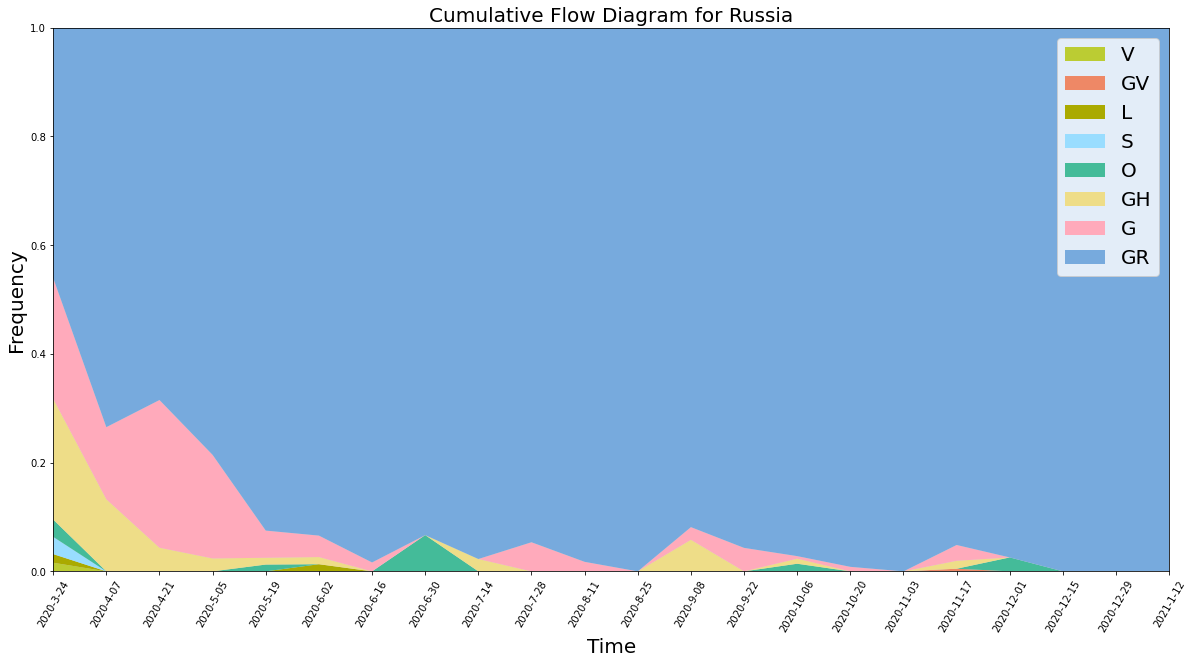

In [17]:
russian_meta = draw_for_region(meta, 'country', "Russia", plot_step=1)

/tmp/ipykernel_35964/3468098923.py:78: RuntimeWarning: invalid value encountered in true_divide
  features = flow / flow.sum(axis=0, keepdims=1)


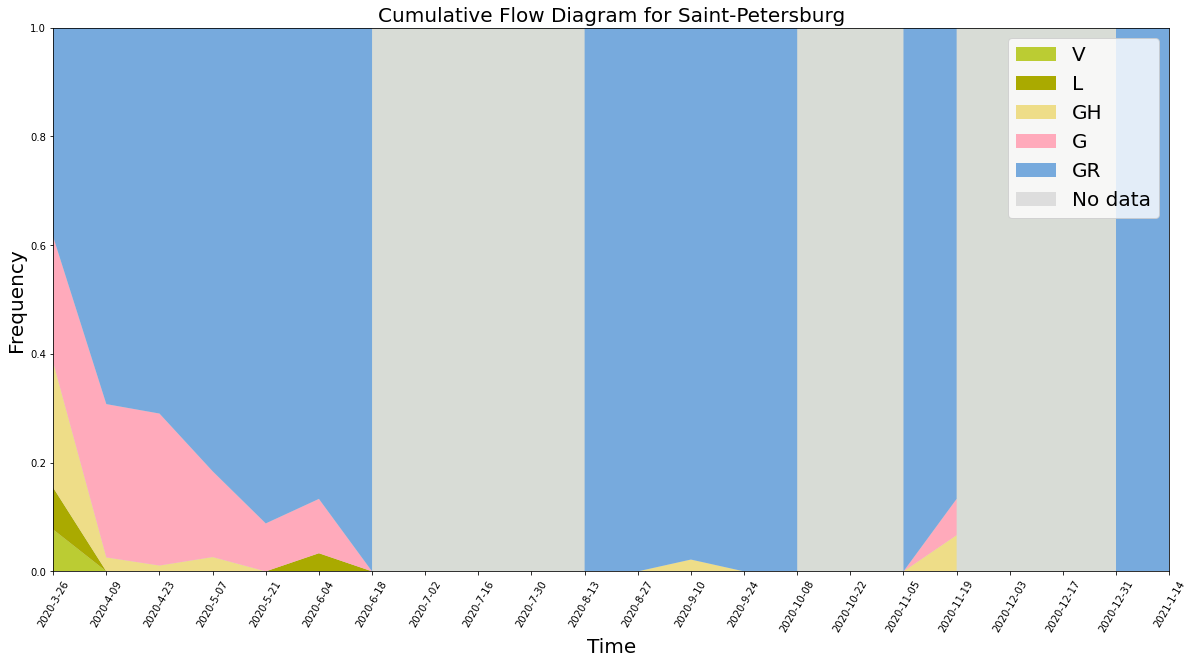

In [18]:
draw_cumulative_flow(
    russian_meta[
        (russian_meta.division == "Saint-Petersburg")
        | (russian_meta.division == "Leningrad Oblast")
        | (russian_meta.location == "Saint-Petersburg")
    ],
    step=14,
    what="Saint-Petersburg",
)

/tmp/ipykernel_35964/3468098923.py:78: RuntimeWarning: invalid value encountered in true_divide
  features = flow / flow.sum(axis=0, keepdims=1)


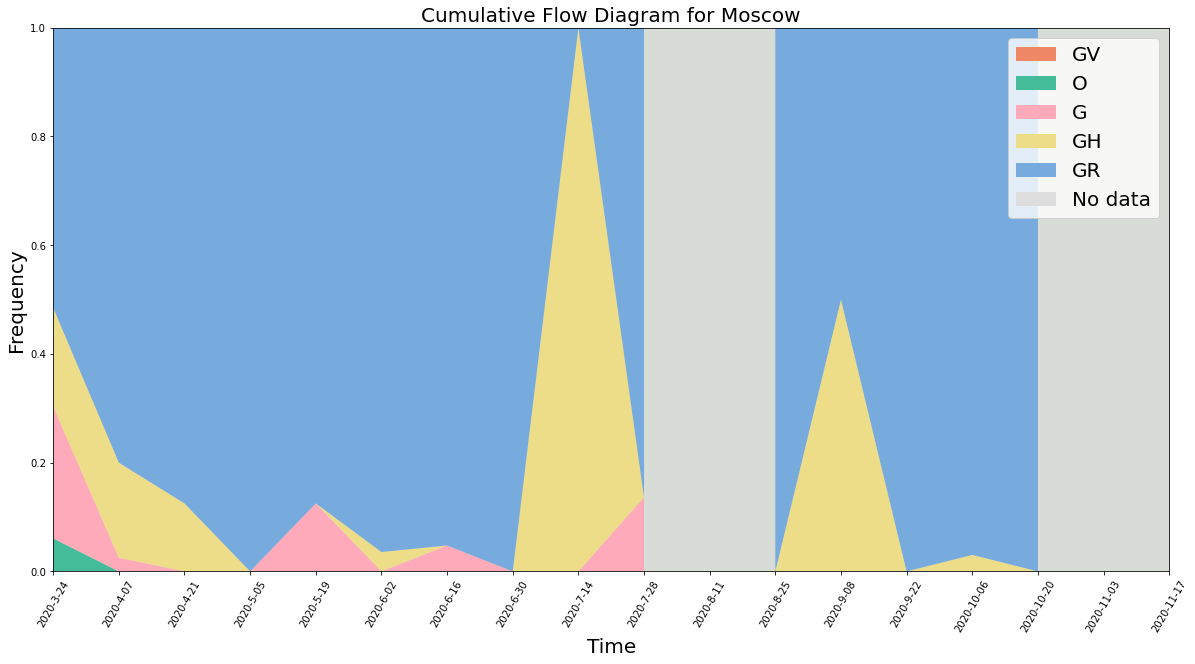

In [19]:
draw_cumulative_flow(
    russian_meta[
        (russian_meta.division == "Moscow Oblast") | (russian_meta.location == "Moscow")
    ],
    step=14,
    what="Moscow",
)

In [20]:
russian_meta.division.unique()

array(['Russia', 'Adygea', 'Altai Krai', 'Amur Region',
       'Astrakhan Region', 'Bashkortostan', 'Bryansk Oblast', 'Buryatia',
       'Chechen Republic', 'Chelyabinsk', 'Moscow Oblast', 'Dagestan',
       'Ingushetia', 'Irkutsk Region', 'Ivanovo', 'Kamchatka Krai',
       'Karachay-Cherkess', 'Krasnodar', 'Kemerovo', 'Kaliningrad Region',
       'Khanty-Mansi', 'Khakassia', 'Kalmykia', 'Kaluga', 'Komi',
       'Karelia', 'Krasnoyarsk', 'Kabardino-Balkaria', 'Khabarovsk',
       'Leningrad Oblast', 'Lipetsk', 'Mari El', 'Republic of Mordovia',
       'Murmansk', 'Novgorod', 'Nizhny Novgorod', 'Novosibirsk',
       'Yamalo-Nenets', 'Omsk', 'Orenburg', 'Oryol', 'Penza', 'Perm Krai',
       'Primorsky', 'Pskov Oblast', 'Rostov', 'Ryazan', 'Samara',
       'Saratov', 'Republic of North Ossetia-Alania', 'Saint-Petersburg',
       'Stavropol', 'Sverdlovsk', 'Republic of Sakha', 'Sakhalin',
       'Tambov Region', 'Tula Region', 'Tyumen Region', 'Tatarstan',
       'Tver', 'Volgograd Region

In [21]:
russian_meta.location.unique()

array([nan, 'Maykop', 'Barnaul', 'Blagoveshchensk', 'Romny', 'Poyarkovo',
       'Yekaterinoslavka', 'Zeya', 'Belogorsk', 'Tambovka', 'Arkhara',
       'Konstantinovka', 'Gilchin', 'Progress', 'Svobodny (Amur)',
       'Akhtubinsk', 'Astrakhan', 'Enotaevka', 'Kharabali', 'Volodarskiy',
       'Ufa', 'Bryansk', 'Grozny', 'Ozyorsk', 'Makhachkala', 'Derbent',
       'Nazran', 'Irkutsk', 'Vichuga', 'Kineshma', 'Yuryevets',
       'Zavolzhsk', 'Mikhalevo', 'Shuya (Ivanovo)', 'Furmanov', 'Ivanovo',
       'Rodniki', 'Petropavlovsk-Kamchatsky', 'Cherkessk',
       'Zelenchukskaya', 'Karachayevsk', 'Sochi', 'Krasnodar', 'Anapa',
       'Armavir', 'Novorossiysk', 'Kemerovo', 'Novokuznetsk',
       'Kaliningrad', 'Khanty-Mansiysk', 'Nizhnevartovsk', 'Surgut',
       'Abakan', 'Elista', 'Tovarkovo', 'Ukhta', 'Sosnogorsk',
       'Petrozavodsk', 'Shuya (Karelia)', 'Sosnovka', 'Kazhma',
       'Pindushi', 'Derevyanka', 'Povenets', 'Medvezhyegorsk',
       'Porosoozero', 'Kondopoga', 'Podporozhye', 

/tmp/ipykernel_35964/3468098923.py:78: RuntimeWarning: invalid value encountered in true_divide
  features = flow / flow.sum(axis=0, keepdims=1)


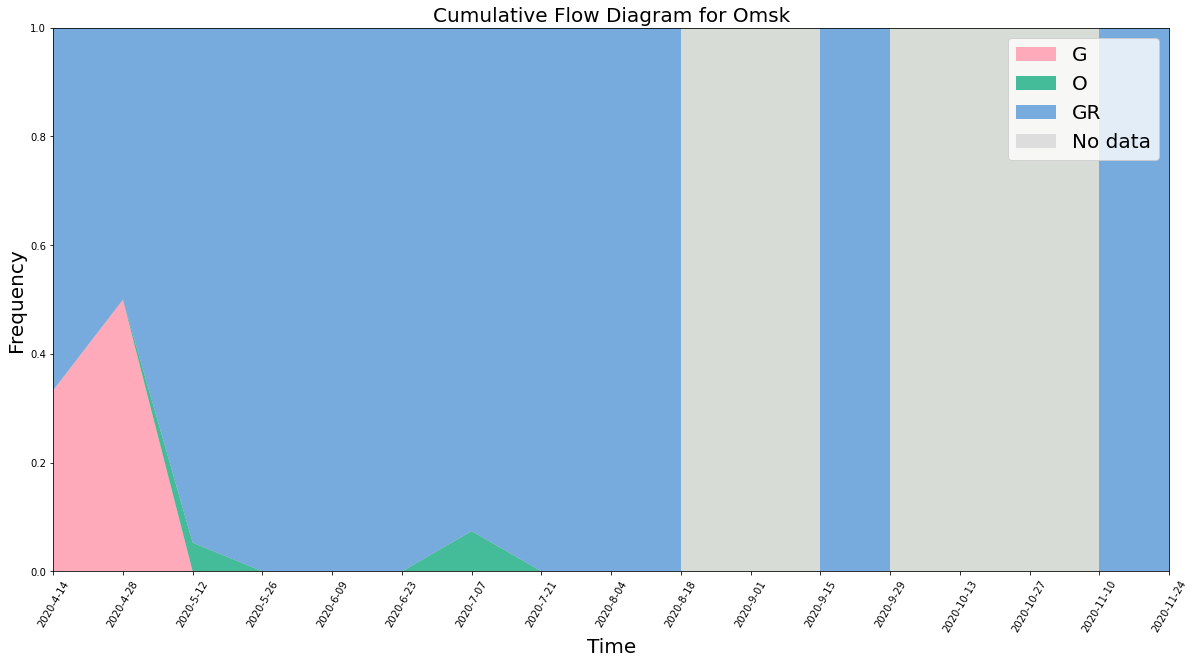

In [22]:
draw_cumulative_flow(
    russian_meta[
        (russian_meta.division == "Omsk") | (russian_meta.location == "Omsk")
    ],
    step=14,
    what="Omsk",
)

In [23]:
mutations = '''26144_G_T Counter({'V': 3128, 'O': 261, 'G': 1})
26144_G_G Counter({'GR': 12554, 'G': 10920, 'GH': 10166, 'S': 3563, 'L': 3277, 'O': 2736, 'V': 443})
28881_G_A Counter({'GR': 11538, 'O': 76, 'G': 71, 'L': 9, 'V': 8, 'GH': 4, 'S': 2})
8782_C_C Counter({'GR': 12553, 'G': 10917, 'GH': 10163, 'V': 3568, 'L': 3277, 'O': 2829, 'S': 170})
14805_C_T Counter({'V': 3054, 'S': 727, 'O': 272, 'GR': 52, 'L': 4, 'G': 1, 'GH': 1})
14408_C_C Counter({'V': 3570, 'S': 3561, 'L': 3276, 'O': 2768, 'GR': 932, 'G': 807, 'GH': 507})
28881_G_G Counter({'GR': 12554, 'G': 10921, 'GH': 10166, 'V': 3571, 'S': 3563, 'L': 3277, 'O': 2997})
14408_C_T Counter({'GR': 11622, 'G': 10114, 'GH': 9659, 'O': 229, 'S': 2, 'L': 1, 'V': 1})
14805_C_C Counter({'GR': 12502, 'G': 10920, 'GH': 10165, 'L': 3273, 'S': 2836, 'O': 2725, 'V': 517})
8782_C_T Counter({'S': 3393, 'O': 168, 'G': 4, 'V': 3, 'GH': 3, 'GR': 1})
23403_A_A Counter({'V': 3564, 'S': 3554, 'L': 3277, 'O': 2783, 'GR': 939, 'G': 807, 'GH': 567})
23403_A_G Counter({'GR': 11615, 'G': 10114, 'GH': 9599, 'O': 214, 'S': 9, 'V': 7})
28144_T_C Counter({'S': 3404, 'O': 223, 'GH': 2, 'V': 1, 'G': 1})
11083_G_G Counter({'GR': 12371, 'G': 10771, 'GH': 9960, 'S': 3511, 'L': 3277, 'O': 1809, 'V': 431})
3037_C_C Counter({'V': 3570, 'S': 3555, 'L': 3277, 'O': 2864, 'GR': 981, 'G': 823, 'GH': 541})
28144_T_T Counter({'GR': 12554, 'G': 10920, 'GH': 10164, 'V': 3570, 'L': 3277, 'O': 2774, 'S': 159})
25563_G_T Counter({'GH': 9614, 'G': 153, 'O': 76, 'S': 4, 'V': 2})
11083_G_T Counter({'V': 3140, 'O': 1188, 'GH': 206, 'GR': 183, 'G': 150, 'S': 52})
3037_C_T Counter({'GR': 11573, 'G': 10098, 'GH': 9625, 'O': 133, 'S': 8, 'V': 1})
28883_G_C Counter({'GR': 11539, 'O': 73, 'G': 71, 'V': 1})
28882_G_A Counter({'GR': 11540, 'O': 73, 'G': 68, 'V': 1})
28883_G_G Counter({'G': 10850, 'GH': 10166, 'V': 3570, 'S': 3563, 'L': 3277, 'O': 2924, 'GR': 1015})
28882_G_G Counter({'G': 10853, 'GH': 10166, 'V': 3570, 'S': 3563, 'L': 3277, 'O': 2924, 'GR': 1014})
241_C_C Counter({'V': 3556, 'S': 3554, 'L': 3277, 'O': 2788, 'G': 1256, 'GR': 1044, 'GH': 649})
25563_G_G Counter({'GR': 12554, 'G': 10768, 'V': 3569, 'S': 3559, 'L': 3277, 'O': 2921, 'GH': 552})
241_C_T Counter({'GR': 11510, 'G': 9665, 'GH': 9517, 'O': 209, 'V': 15, 'S': 9})'''

In [24]:
a = [i.replace("})", "").split(" Counter({") for i in mutations.split("\n")]
mut_to_clade = defaultdict(lambda: defaultdict(str))

for mut, clade_count in a:
    for clade, count in [i.replace('\'', '').replace(':', '').split(' ') for i in clade_count.split(', ')]:
        mut_to_clade[mut][clade] = int(count)
print(mut_to_clade)

defaultdict(<function <lambda> at 0x7f771af81160>, {'26144_G_T': defaultdict(<class 'str'>, {'V': 3128, 'O': 261, 'G': 1}), '26144_G_G': defaultdict(<class 'str'>, {'GR': 12554, 'G': 10920, 'GH': 10166, 'S': 3563, 'L': 3277, 'O': 2736, 'V': 443}), '28881_G_A': defaultdict(<class 'str'>, {'GR': 11538, 'O': 76, 'G': 71, 'L': 9, 'V': 8, 'GH': 4, 'S': 2}), '8782_C_C': defaultdict(<class 'str'>, {'GR': 12553, 'G': 10917, 'GH': 10163, 'V': 3568, 'L': 3277, 'O': 2829, 'S': 170}), '14805_C_T': defaultdict(<class 'str'>, {'V': 3054, 'S': 727, 'O': 272, 'GR': 52, 'L': 4, 'G': 1, 'GH': 1}), '14408_C_C': defaultdict(<class 'str'>, {'V': 3570, 'S': 3561, 'L': 3276, 'O': 2768, 'GR': 932, 'G': 807, 'GH': 507}), '28881_G_G': defaultdict(<class 'str'>, {'GR': 12554, 'G': 10921, 'GH': 10166, 'V': 3571, 'S': 3563, 'L': 3277, 'O': 2997}), '14408_C_T': defaultdict(<class 'str'>, {'GR': 11622, 'G': 10114, 'GH': 9659, 'O': 229, 'S': 2, 'L': 1, 'V': 1}), '14805_C_C': defaultdict(<class 'str'>, {'GR': 12502, '

In [25]:
meta[meta.country=='United Kingdom']

date  region         country division location region_exposure  \
72983   2020-01-29  Europe  United Kingdom  England      NaN            Asia   
72984   2020-01-29  Europe  United Kingdom  England      NaN            Asia   
72985   2020-02-09  Europe  United Kingdom  England      NaN            Asia   
72986   2020-01-29  Europe  United Kingdom  England      NaN          Europe   
72987   2020-02-05  Europe  United Kingdom  England      NaN          Europe   
...            ...     ...             ...      ...      ...             ...   
454744  2021-01-04  Europe  United Kingdom    Wales      NaN          Europe   
454745  2021-01-05  Europe  United Kingdom    Wales      NaN          Europe   
454746  2021-01-07  Europe  United Kingdom    Wales      NaN          Europe   
454747  2021-01-06  Europe  United Kingdom    Wales      NaN          Europe   
454748  2021-01-06  Europe  United Kingdom    Wales      NaN          Europe   

       country_exposure division_exposure  length age     sex  \
72983             China             Hubei   29838  50  Female   
72984             China             Hubei   29838  23    Male   
72985             China             Hubei   29885  27  Female   
72986    United Kingdom           England   29846   ?       ?   
72987    United Kingdom           England   29894  53    Male   
...                 ...               ...     ...  ..     ...   
454744   United Kingdom             Wales   29765   ?       ?   
454745   United Kingdom             Wales   29782   ?       ?   
454746   United Kingdom             Wales   29782   ?       ?   
454747   United Kingdom             Wales   29763   ?       ?   
454748   United Kingdom             Wales   29782   ?       ?   

       Nextstrain_clade pangolin_lineage GISAID_clade                Virus_id  \
72983               19B                B            S         England/01/2020   
72984               19B                B            S         England/02/2020   
72985               19A             B.40            O        England/09c/2020   
72986               19B                B            S          England/2/2020   
72987               19A                B            L  England/200641094/2020   
...                 ...              ...          ...                     ...   
454744      20I/501Y.V1          B.1.1.7           GR  Wales/QEUH-EFB1DA/2021   
454745        20E (EU1)          B.1.177           GV  Wales/QEUH-EFF24C/2021   
454746        20E (EU1)          B.1.177           GV  Wales/QEUH-F65E1F/2021   
454747      20I/501Y.V1          B.1.1.7           GR  Wales/QEUH-F67B43/2021   
454748              20B         B.1.1.70           GR  Wales/QEUH-F67BAD/2021   

          day  
72983    89.0  
72984    89.0  
72985   100.0  
72986    89.0  
72987    96.0  
...       ...  
454744  430.0  
454745  431.0  
454746  433.0  
454747  432.0  
454748  432.0  

[195088 rows x 16 columns]

## MAP OF UNIQUE MUTATIONS

In [26]:
import pycountry
from good_mutations import good_mutations

In [27]:
good_mutations[0]

('783_T_C', 18, 'Australia', {'missense_variant'})

In [28]:
def return_iso(cc):
    try:
        return list(pycountry.countries.search_fuzzy(cc))[0].alpha_3
    except LookupError:
        if cc == "south korea":
            return "KOR"


good_mut_data = pd.DataFrame(
    [[i[0], i[1], i[2]] for i in good_mutations],
    columns=["mutations", "amount", "country"],
)
good_mut_data["mut_exists"] = 1

data_agg = good_mut_data.groupby("country").agg(
    mut_amount=("amount", "sum"),  # total number of occurrences
    type_amount=("mut_exists", "sum"),  # number of unique occurrences
    country=("country", "first"),
)
assemblies = (
    meta.country.value_counts()
    .to_frame()
    .rename(columns={"country": "assembly_amount"})
)
country_assembly = assemblies.join(data_agg, how="inner")
country_assembly["normalized_amount_of_types"] = (
    country_assembly.type_amount / country_assembly.assembly_amount
)
country_assembly["normalized_amount_of_muts"] = (
    country_assembly.mut_amount / country_assembly.assembly_amount
)
country_assembly["country"] = country_assembly.index

country_assembly["iso_alpha"] = country_assembly.country.apply(return_iso)
country_assembly.head()

assembly_amount  mut_amount  type_amount         country  \
United Kingdom           195088        9404          222  United Kingdom   
USA                       90456        6989          170             USA   
Denmark                   34362        1128           33         Denmark   
Australia                 17290        1199           13       Australia   
Japan                     17115          82            5           Japan   

                normalized_amount_of_types  normalized_amount_of_muts  \
United Kingdom                    0.001138                   0.048204   
USA                               0.001879                   0.077264   
Denmark                           0.000960                   0.032827   
Australia                         0.000752                   0.069346   
Japan                             0.000292                   0.004791   

               iso_alpha  
United Kingdom       GBR  
USA                  USA  
Denmark              DNK  
Australia            AUS  
Japan                JPN

In [29]:
country_assembly.sort_values(by='assembly_amount', ascending = False)

assembly_amount  mut_amount  type_amount         country  \
United Kingdom           195088        9404          222  United Kingdom   
USA                       90456        6989          170             USA   
Denmark                   34362        1128           33         Denmark   
Australia                 17290        1199           13       Australia   
Japan                     17115          82            5           Japan   
Canada                     8625         523           11          Canada   
Switzerland                8075          10            1     Switzerland   
Spain                      7499          85            3           Spain   
Netherlands                7050         177            8     Netherlands   
India                      5094         250           14           India   
Germany                    4656          48            4         Germany   
France                     4457          23            2          France   
Iceland                    4175          18            1         Iceland   
Luxembourg                 3225         304           10      Luxembourg   
South Africa               3062          89            3    South Africa   
Italy                      2978          18            1           Italy   
Portugal                   2422          45            2        Portugal   
Brazil                     2410          11            1          Brazil   
Russia                     1818          14            1          Russia   
Singapore                  1745          43            3       Singapore   
South Korea                1631         115            4     South Korea   
Finland                    1154          23            1         Finland   
Israel                     1128          10            1          Israel   
Chile                       959          10            1           Chile   
China                       913          67            4           China   
Bangladesh                  792          12            1      Bangladesh   
Peru                        441          10            1            Peru   
Romania                     198          12            1         Romania   
Bahrain                     150          12            1         Bahrain   
Vietnam                     142          26            1         Vietnam   
Slovakia                    122          15            1        Slovakia   

                normalized_amount_of_types  normalized_amount_of_muts  \
United Kingdom                    0.001138                   0.048204   
USA                               0.001879                   0.077264   
Denmark                           0.000960                   0.032827   
Australia                         0.000752                   0.069346   
Japan                             0.000292                   0.004791   
Canada                            0.001275                   0.060638   
Switzerland                       0.000124                   0.001238   
Spain                             0.000400                   0.011335   
Netherlands                       0.001135                   0.025106   
India                             0.002748                   0.049077   
Germany                           0.000859                   0.010309   
France                            0.000449                   0.005160   
Iceland                           0.000240                   0.004311   
Luxembourg                        0.003101                   0.094264   
South Africa                      0.000980                   0.029066   
Italy                             0.000336                   0.006044   
Portugal                          0.000826                   0.018580   
Brazil                            0.000415                   0.004564   
Russia                            0.000550                   0.007701   
Singapore                         0.001719                   0.024642   
South Korea                       0.002452        

In [30]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.choropleth(
    country_assembly,
    locations="iso_alpha",
    color="type_amount",  # lifeExp is a column of gapminder
    hover_name="country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Amount of unique mutations",
)
fig.show()

In [31]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.choropleth(
    country_assembly,
    locations="iso_alpha",
    color="normalized_amount_of_types",  # lifeExp is a column of gapminder
    hover_name="country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Normalized amount of unique mutations",
)

fig.show()